<a href="https://colab.research.google.com/github/bakanino/PHYS4016/blob/main/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
drive_path = '/content/drive/MyDrive/'
d3_X = np.load(drive_path+'X_kannada_MNIST_60K.npz')['arr_0']
y = np.load(drive_path+'y_kannada_MNIST_60K.npz')['arr_0']

In [4]:
nsamples, nx, ny = d3_X.shape
d2_X = d3_X.reshape((nsamples,nx*ny))
d2_X.shape
X = d2_X

In [5]:
rndperm = np.random.permutation(y.shape[0])

In [6]:
N = 1000
y_subset = y[rndperm[:N]].copy()
X_subset = X[rndperm[:N],:].copy()
y_subset.shape, X_subset.shape

((1000,), (1000, 784))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, 
    y_subset, 
    test_size=0.2, 
    shuffle=True,
    random_state=42)

# K-nearest neighbours `(k=5)`

*   List item
*   List item



In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [190]:
accuracy=[]
for k in range(5):
    knn=KNeighborsClassifier(n_neighbors=k+1)
    knn.fit(X_train,y_train)
    knn_pred=knn.predict(X_test)
    print(accuracy_score(y_test, knn_pred))
    accuracy.append(accuracy_score(y_test, knn_pred))

0.905
0.87
0.91
0.89
0.895


Best accuracy k=5: 0.91


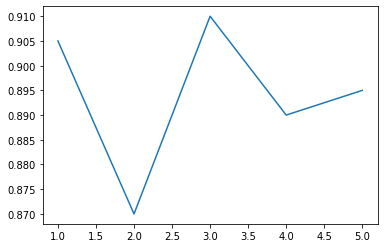

In [198]:
k=range(1,5+1)
plt.plot(k, accuracy)
k_best=accuracy.index(max(accuracy))
print('Best accuracy k=5:',accuracy[k_best])

In [176]:
knn_best=KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [177]:
pred = knn_best.predict(X_test)

In [178]:
y_test[np.argmax(y_test[:20])]

9

Equality test: 19 / 20


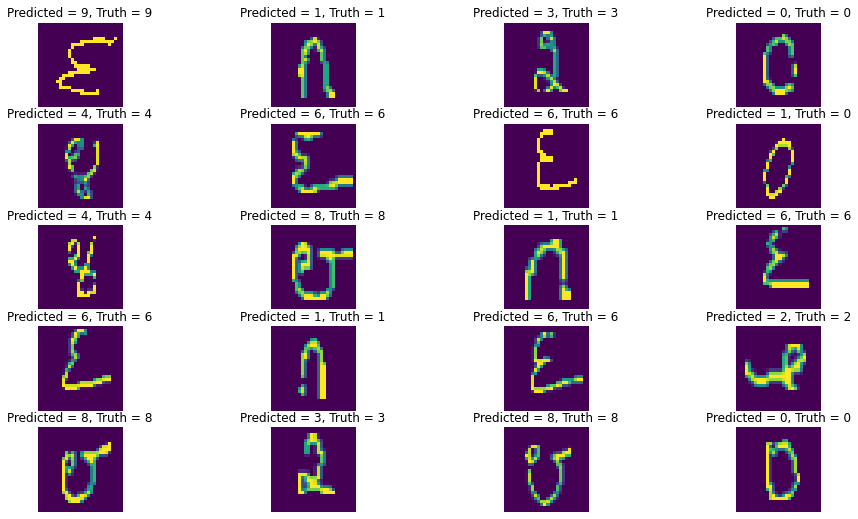

In [186]:
print('Equality test:', sum(pred[:20] == y_test[:20]),'/',y_test[:20].shape[0])

plt.figure(figsize=(16, 9))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.axis('off')
    predicted = pred[i]
    truth = y_test[i]
    plt.title('Predicted = {}, Truth = {}'.format(predicted, truth))
    plt.imshow(X_test[i].reshape((28,28)),interpolation='nearest')

## K-nearest neighbours `(k=[5,10,20,50,100])`

In [220]:
def knn(K):
  accuracy=[]
  for k in range(K):
      knn=KNeighborsClassifier(n_neighbors=k+1)
      knn.fit(X_train,y_train)
      knn_pred=knn.predict(X_test)
      #print(accuracy_score(y_test, knn_pred))
      accuracy.append(accuracy_score(y_test, knn_pred))

  k_best=accuracy.index(max(accuracy))
  best_acc = accuracy[k_best]
  avg_acc = np.round(np.mean(accuracy),2)

  knn_best=KNeighborsClassifier(n_neighbors=k_best)
  knn_best.fit(X_train,y_train)

  pred = knn_best.predict(X_test)

  return avg_acc, best_acc, pred

In [211]:
K = [5,10,20,50,100]
for k in K:
  acc, pred = knn(k)
  print('Best accuracy k={}:'.format(k),acc)

0.905
0.87
0.91
0.89
0.895
Best accuracy k=5: 0.91
0.905
0.87
0.91
0.89
0.895
0.9
0.91
0.91
0.905
0.905
Best accuracy k=10: 0.91
0.905
0.87
0.91
0.89
0.895
0.9
0.91
0.91
0.905
0.905
0.905
0.885
0.885
0.88
0.88
0.875
0.865
0.875
0.86
0.88
Best accuracy k=20: 0.91
0.905
0.87
0.91
0.89
0.895
0.9
0.91
0.91
0.905
0.905
0.905
0.885
0.885
0.88
0.88
0.875
0.865
0.875
0.86
0.88
0.865
0.88
0.86
0.865
0.865
0.865
0.85
0.86
0.85
0.85
0.85
0.855
0.855
0.86
0.855
0.86
0.85
0.845
0.845
0.845
0.85
0.85
0.85
0.85
0.85
0.845
0.84
0.845
0.845
0.845
Best accuracy k=50: 0.91
0.905
0.87
0.91
0.89
0.895
0.9
0.91
0.91
0.905
0.905
0.905
0.885
0.885
0.88
0.88
0.875
0.865
0.875
0.86
0.88
0.865
0.88
0.86
0.865
0.865
0.865
0.85
0.86
0.85
0.85
0.85
0.855
0.855
0.86
0.855
0.86
0.85
0.845
0.845
0.845
0.85
0.85
0.85
0.85
0.85
0.845
0.84
0.845
0.845
0.845
0.835
0.83
0.83
0.835
0.835
0.83
0.825
0.835
0.825
0.82
0.825
0.825
0.82
0.825
0.815
0.82
0.815
0.825
0.825
0.83
0.825
0.825
0.825
0.83
0.82
0.815
0.815
0.805
0.805
0

Accuracy peaks at 0.91

Right-skewed for increasing values of K

In [221]:
K = [5,10,20,50,100]
for k in K:
  avg, best, pred = knn(k)
  print('k={}: Best accuracy='.format(k),best)
  print(' k={}: Average accuracy='.format(k),avg)

k=5: Best accuracy= 0.91
 k=5: Average accuracy= 0.89
k=10: Best accuracy= 0.91
 k=10: Average accuracy= 0.9
k=20: Best accuracy= 0.91
 k=20: Average accuracy= 0.89
k=50: Best accuracy= 0.91
 k=50: Average accuracy= 0.87
k=100: Best accuracy= 0.91
 k=100: Average accuracy= 0.84


# Fully-connected Neural Network

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    shuffle=True,
    random_state=42)

In [14]:
import keras
from keras.layers import InputLayer, Dense

In [23]:
model = keras.Sequential()

model.add(InputLayer(28**2))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                11775     
                                                                 
 dense_7 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1770 - accuracy: 0.9472 - val_loss: 0.2826 - val_accuracy: 0.9278
Epoch 2/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1750 - accuracy: 0.9465 - val_loss: 0.2636 - val_accuracy: 0.9324
Epoch 3/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1666 - accuracy: 0.9516 - val_loss: 0.2910 - val_accuracy: 0.9331
Epoch 4/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1698 - accuracy: 0.9501 - val_loss: 0.2832 - val_accuracy: 0.9287
Epoch 5/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1617 - accuracy: 0.9518 - val_loss: 0.2724 - val_accuracy: 0.9370
Epoch 6/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1618 - accuracy: 0.9526 - val_loss: 0.2782 - val_accuracy: 0.9376
Epoch 7/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1604 - accuracy: 0.9538 - val_loss: 0.2681 - val_accuracy:

In [39]:
loss, accuracy = model.evaluate(X_test, y_test)

375/375 [==============================] - 0s 1ms/step - loss: 0.2836 - accuracy: 0.9473


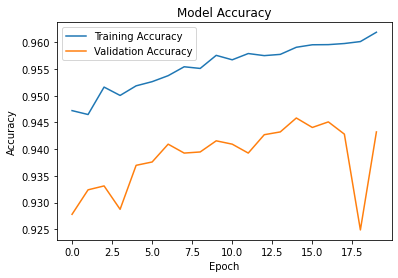

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

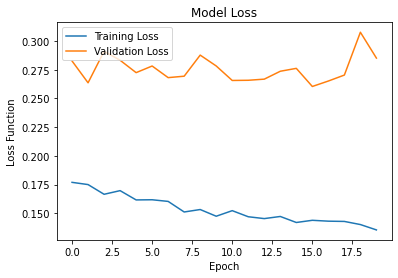

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss Function')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

In [86]:
predictions = model.predict(X_test)

375/375 [==============================] - 0s 985us/step


Predictions: [8 0 1 5 9 2 1 7 6 2 0 9 6 8 7 4 5 8 1 7]
Ground truth: 4
Equality test: [False False False False False False False False False False False False
 False False False  True False False False False]


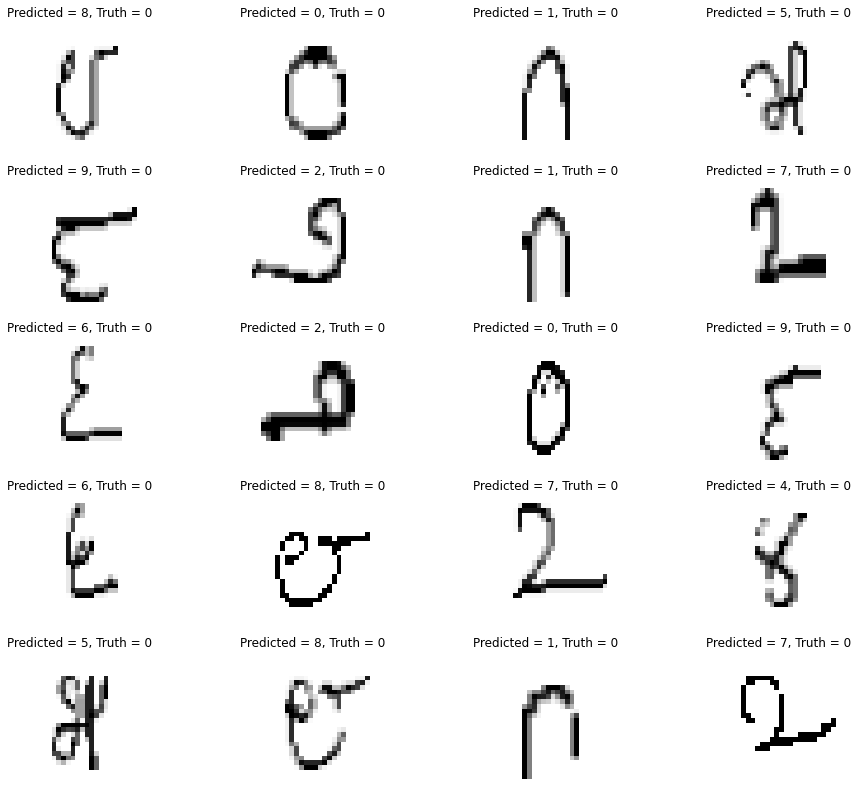

In [102]:
examples = 20
print('Predictions:', np.argmax(predictions[:examples], axis=1))
print('Ground truth:', np.argmax(y_test[:examples]))
print('Equality test:', np.argmax(predictions[:examples], axis=1) == np.argmax(y_test[:examples]))
plt.figure(figsize=(16, 14))
for i in range(20):
    predicted = np.argmax(predictions[i])
    truth = np.argmax(y_test[i])
    plt.subplot(5,4,i+1)
    plt.axis('off')
    plt.imshow(X_test[i].reshape((28, 28)), cmap='binary')
    plt.title('Predicted = {}, Truth = {}'.format(predicted, truth))

## Hyperparameter Tuning

In [114]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 14.1 MB/s 
     |████████████████████████████████| 1.6 MB 60.5 MB/s 


In [134]:
def plot_accuracy(history, epoch):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch %d' % epoch)
  plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
  plt.show()

In [133]:
def plot_loss(history, epoch):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss Function')
  plt.xlabel('Epoch %d' % epoch)
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
  plt.show()

In [124]:
def nn(learning_rate, epoch):
  model = keras.Sequential()

  model.add(InputLayer(28**2))
  model.add(Dense(15, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=epoch, validation_split=0.2)

  loss, accuracy = model.evaluate(X_test, y_test)

  return history, loss, accuracy

Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.1132 - accuracy: 0.2398 - val_loss: 1.9150 - val_accuracy: 0.2755
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 1.8254 - accuracy: 0.2777 - val_loss: 1.7432 - val_accuracy: 0.2840
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 1.7990 - accuracy: 0.2751 - val_loss: 1.7584 - val_accuracy: 0.2861
Epoch 4/5
1200/1200 [==============================] - 4s 4ms/step - loss: 1.8202 - accuracy: 0.2811 - val_loss: 1.7802 - val_accuracy: 0.2850
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 1.7542 - accuracy: 0.2852


<Figure size 1152x648 with 0 Axes>

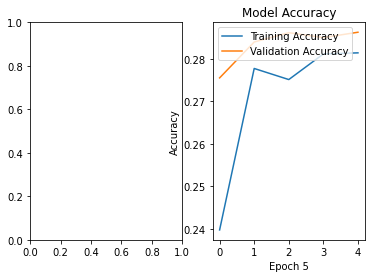

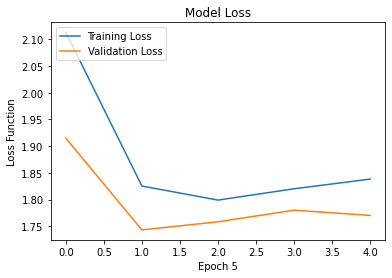

Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.4250 - accuracy: 0.4316 - val_loss: 1.0867 - val_accuracy: 0.5947
Epoch 2/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.9449 - accuracy: 0.6178 - val_loss: 0.8549 - val_accuracy: 0.6614
Epoch 3/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.7892 - accuracy: 0.6839 - val_loss: 0.7312 - val_accuracy: 0.7180
Epoch 4/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.6640 - accuracy: 0.7439 - val_loss: 0.6018 - val_accuracy: 0.8058
Epoch 5/5
375/375 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.8128


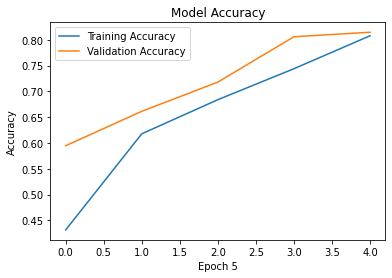

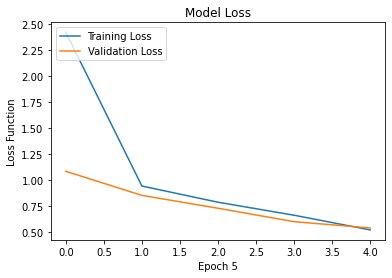

Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 8.8942 - accuracy: 0.2352 - val_loss: 2.2754 - val_accuracy: 0.2559
Epoch 2/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.0605 - accuracy: 0.2842 - val_loss: 1.9545 - val_accuracy: 0.3105
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 1.8308 - accuracy: 0.3440 - val_loss: 1.7590 - val_accuracy: 0.3756
Epoch 4/5
1200/1200 [==============================] - 2s 2ms/step - loss: 1.6296 - accuracy: 0.4179 - val_loss: 1.5281 - val_accuracy: 0.4815
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 1.3283 - accuracy: 0.5754


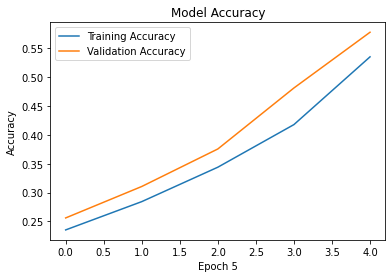

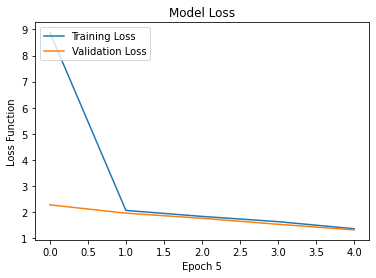

In [146]:
lr_dict_e5 = dict()

plt.figure(figsize=(16, 9))
plt.subplots(1,2)
for lr in [1e-2, 1e-3, 1e-4]:
  history, loss, accuracy = nn(lr, 5)
  lr_dict_e5[lr] = (loss, accuracy)
  plot_accuracy(history, 5)
  plot_loss(history, 5)

Epoch 1/10
1200/1200 [==============================] - 3s 2ms/step - loss: 1.9455 - accuracy: 0.3339 - val_loss: 1.5676 - val_accuracy: 0.3806
Epoch 2/10
1200/1200 [==============================] - 3s 2ms/step - loss: 1.6536 - accuracy: 0.3530 - val_loss: 1.5427 - val_accuracy: 0.3710
Epoch 3/10
1200/1200 [==============================] - 2s 2ms/step - loss: 1.6425 - accuracy: 0.3527 - val_loss: 1.6849 - val_accuracy: 0.3380
Epoch 4/10
1200/1200 [==============================] - 2s 2ms/step - loss: 1.6799 - accuracy: 0.3451 - val_loss: 1.7943 - val_accuracy: 0.2929
Epoch 5/10
1200/1200 [==============================] - 6s 5ms/step - loss: 1.7280 - accuracy: 0.3154 - val_loss: 1.6536 - val_accuracy: 0.3556
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/step - loss: 1.6837 - accuracy: 0.3442 - val_loss: 1.6783 - val_accuracy: 0.3494
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 1.7010 - accuracy: 0.3401 - val_loss: 1.7309 - val_accuracy:

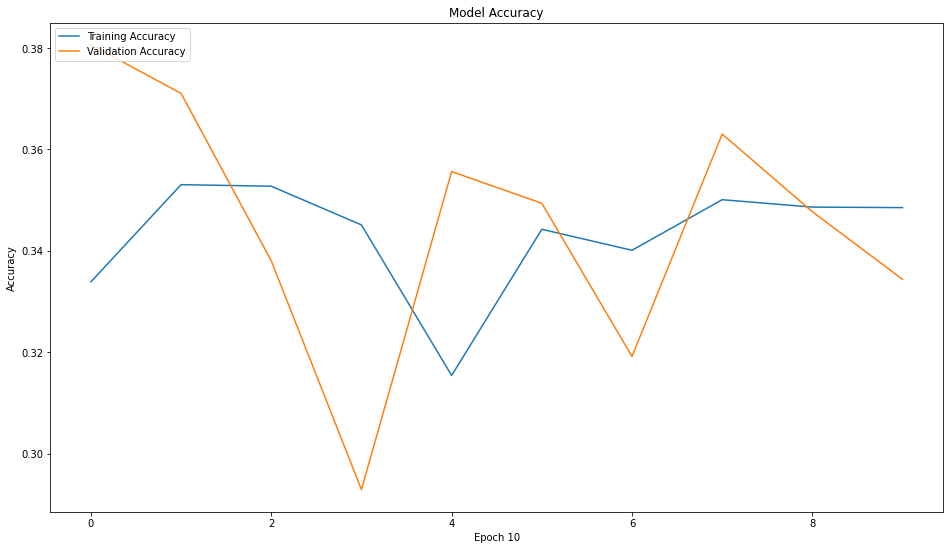

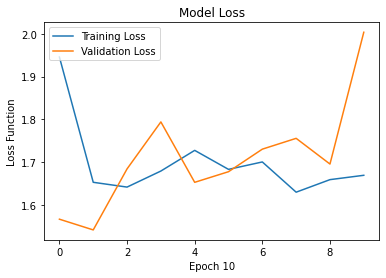

Epoch 1/10
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3164 - accuracy: 0.4276 - val_loss: 1.0424 - val_accuracy: 0.6319
Epoch 2/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.8738 - accuracy: 0.6878 - val_loss: 0.8411 - val_accuracy: 0.6676
Epoch 3/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.6905 - accuracy: 0.7511 - val_loss: 0.6443 - val_accuracy: 0.7962
Epoch 4/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.5258 - accuracy: 0.8268 - val_loss: 0.5151 - val_accuracy: 0.8373
Epoch 5/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4475 - accuracy: 0.8575 - val_loss: 0.4417 - val_accuracy: 0.8692
Epoch 6/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3292 - accuracy: 0.9097 - val_loss: 0.3217 - val_accuracy: 0.9161
Epoch 7/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.2550 - accuracy: 0.9298 - val_loss: 0.3212 - val_accuracy:

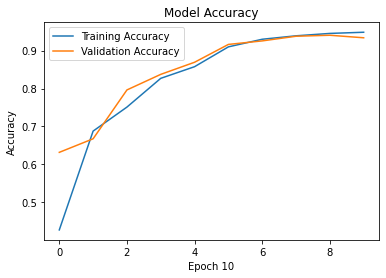

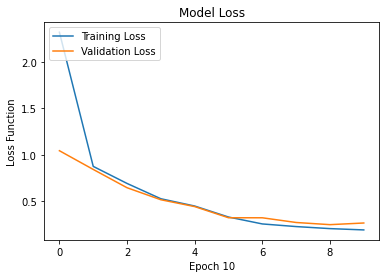

Epoch 1/10
1200/1200 [==============================] - 3s 2ms/step - loss: 9.1505 - accuracy: 0.2786 - val_loss: 2.2934 - val_accuracy: 0.2766
Epoch 2/10
1200/1200 [==============================] - 2s 2ms/step - loss: 2.0559 - accuracy: 0.3353 - val_loss: 1.8342 - val_accuracy: 0.3844
Epoch 3/10
1200/1200 [==============================] - 2s 2ms/step - loss: 1.6641 - accuracy: 0.4475 - val_loss: 1.4763 - val_accuracy: 0.5196
Epoch 4/10
1200/1200 [==============================] - 2s 2ms/step - loss: 1.2696 - accuracy: 0.5986 - val_loss: 1.0789 - val_accuracy: 0.6969
Epoch 5/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.9289 - accuracy: 0.7338 - val_loss: 0.8814 - val_accuracy: 0.7801
Epoch 6/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.7578 - accuracy: 0.8028 - val_loss: 0.7480 - val_accuracy: 0.8331
Epoch 7/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.6357 - accuracy: 0.8482 - val_loss: 0.6619 - val_accuracy:

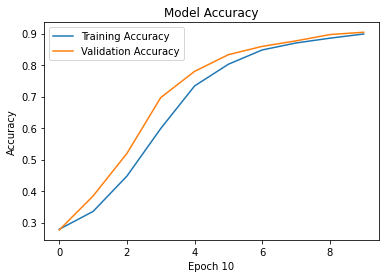

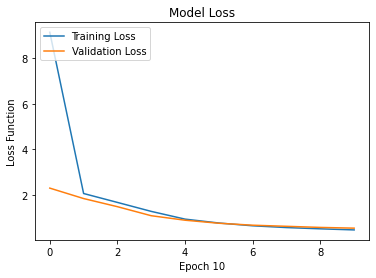

In [147]:
lr_dict_e10 = dict()

plt.figure(figsize=(16, 9))
for lr in [1e-2, 1e-3, 1e-4]:
  history, loss, accuracy = nn(lr, 10)
  lr_dict_e10[lr] = (loss, accuracy)
  plot_accuracy(history, 10)
  plot_loss(history, 10)

In [152]:
lr_dict_e5

{0.01: (1.75416100025177, 0.2851666808128357),
 0.001: (0.5650659799575806, 0.812833309173584),
 0.0001: (1.3282979726791382, 0.5754166841506958)}

In [151]:
lr_dict_e10

{0.01: (1.919883131980896, 0.3321666717529297),
 0.001: (0.24954693019390106, 0.9360833168029785),
 0.0001: (0.5280146598815918, 0.9024999737739563)}

In [156]:
learning_rate = 1e-3
epoch = 10

model = keras.Sequential()

model.add(InputLayer(28**2))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epoch, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/10
1200/1200 [==============================] - 3s 2ms/step - loss: 2.2632 - accuracy: 0.4008 - val_loss: 1.1251 - val_accuracy: 0.6117
Epoch 2/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.9244 - accuracy: 0.6671 - val_loss: 0.7767 - val_accuracy: 0.7608
Epoch 3/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.5872 - accuracy: 0.8373 - val_loss: 0.5140 - val_accuracy: 0.8704
Epoch 4/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3928 - accuracy: 0.8947 - val_loss: 0.3452 - val_accuracy: 0.9082
Epoch 5/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.2676 - accuracy: 0.9278 - val_loss: 0.3079 - val_accuracy: 0.9218
Epoch 6/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.2262 - accuracy: 0.9390 - val_loss: 0.3101 - val_accuracy: 0.9347
Epoch 7/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1894 - accuracy: 0.9474 - val_loss: 0.2182 - val_accuracy:

In [157]:
accuracy, loss

(0.9555833339691162, 0.18772460520267487)

Predictions: [8 0 1 5 9 2 1 7 6 2 0 9 6 8 7 4 5 8 1 7]
Ground truth: 4
Equality test: [False False False False False False False False False False False False
 False False False  True False False False False]


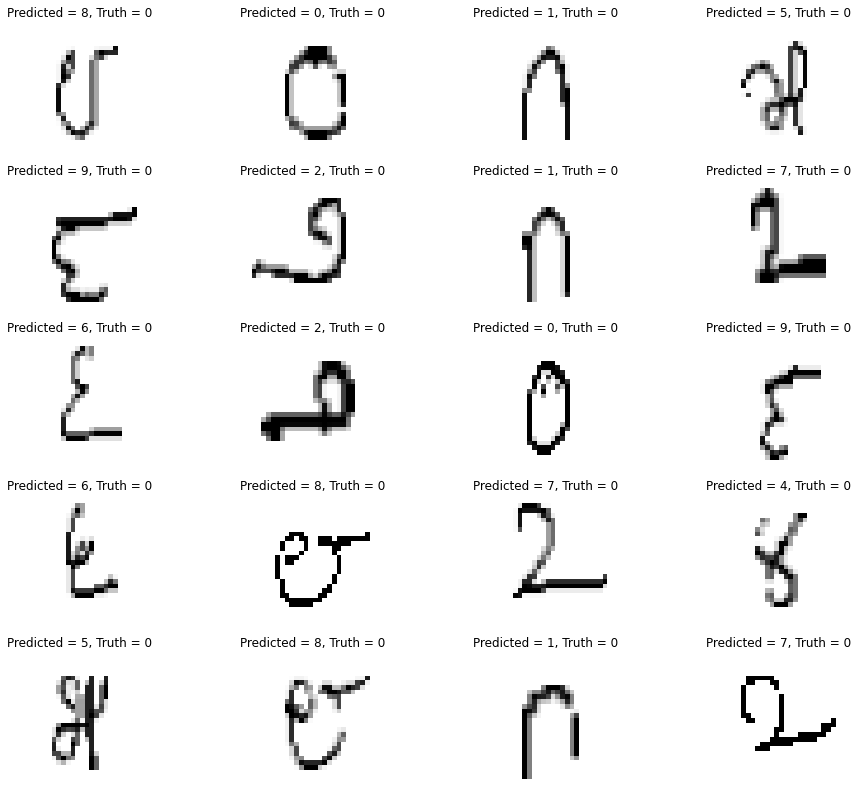

In [162]:
examples = 20
print('Predictions:', np.argmax(predictions[:examples], axis=1))
print('Ground truth:', np.argmax(y_test[:examples]))
print('Equality test:', np.argmax(predictions[:examples], axis=1) == np.argmax(y_test[:examples]))
plt.figure(figsize=(16, 14))
for i in range(20):
    predicted = np.argmax(predictions[i])
    truth = np.argmax(y_test[i])
    plt.subplot(5,4,i+1)
    plt.axis('off')
    plt.imshow(X_test[i].reshape((28, 28)), cmap='binary')
    plt.title('Predicted = {}, Truth = {}'.format(predicted, truth))